In [16]:
#@title 1. Configuração e Upload
# Importa as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Configura o estilo dos gráficos
sns.set_theme(style="whitegrid")

print("Por favor, faça o upload do seu arquivo 'pathfinding_benchmark.csv'")
# Solicita o upload do arquivo
uploaded = files.upload()

# Pega o nome do arquivo que foi enviado
filename = list(uploaded.keys())[0]

print(f"\nArquivo '{filename}' carregado com sucesso.")

# Carrega o CSV em um DataFrame do Pandas
try:
    df = pd.read_csv(filename)

    # Cria uma nova coluna 'grid_area' para análise de resolução
    df['grid_area'] = df['grid_width'] * df['grid_height']

    # Exibe as primeiras linhas e informações para confirmar
    print("\n--- Dados Carregados ---")
    print(df.info())
    print("\n--- Amostra dos Dados ---")
    print(df.head())

except Exception as e:
    print(f"\nErro ao ler o arquivo: {e}")
    print("Certifique-se de que é um CSV válido.")

Por favor, faça o upload do seu arquivo 'pathfinding_benchmark.csv'


Saving pathfinding_benchmark.csv to pathfinding_benchmark (3).csv

Arquivo 'pathfinding_benchmark (3).csv' carregado com sucesso.

--- Dados Carregados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grid_width             45 non-null     int64  
 1   grid_height            45 non-null     int64  
 2   obstacle_density       45 non-null     float64
 3   num_agents             45 non-null     int64  
 4   total_time_us          45 non-null     float64
 5   avg_time_per_agent_us  45 non-null     float64
 6   grid_area              45 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.6 KB
None

--- Amostra dos Dados ---
   grid_width  grid_height  obstacle_density  num_agents  total_time_us  \
0          30           18               0.1          10         138.33   
1          30           18               0

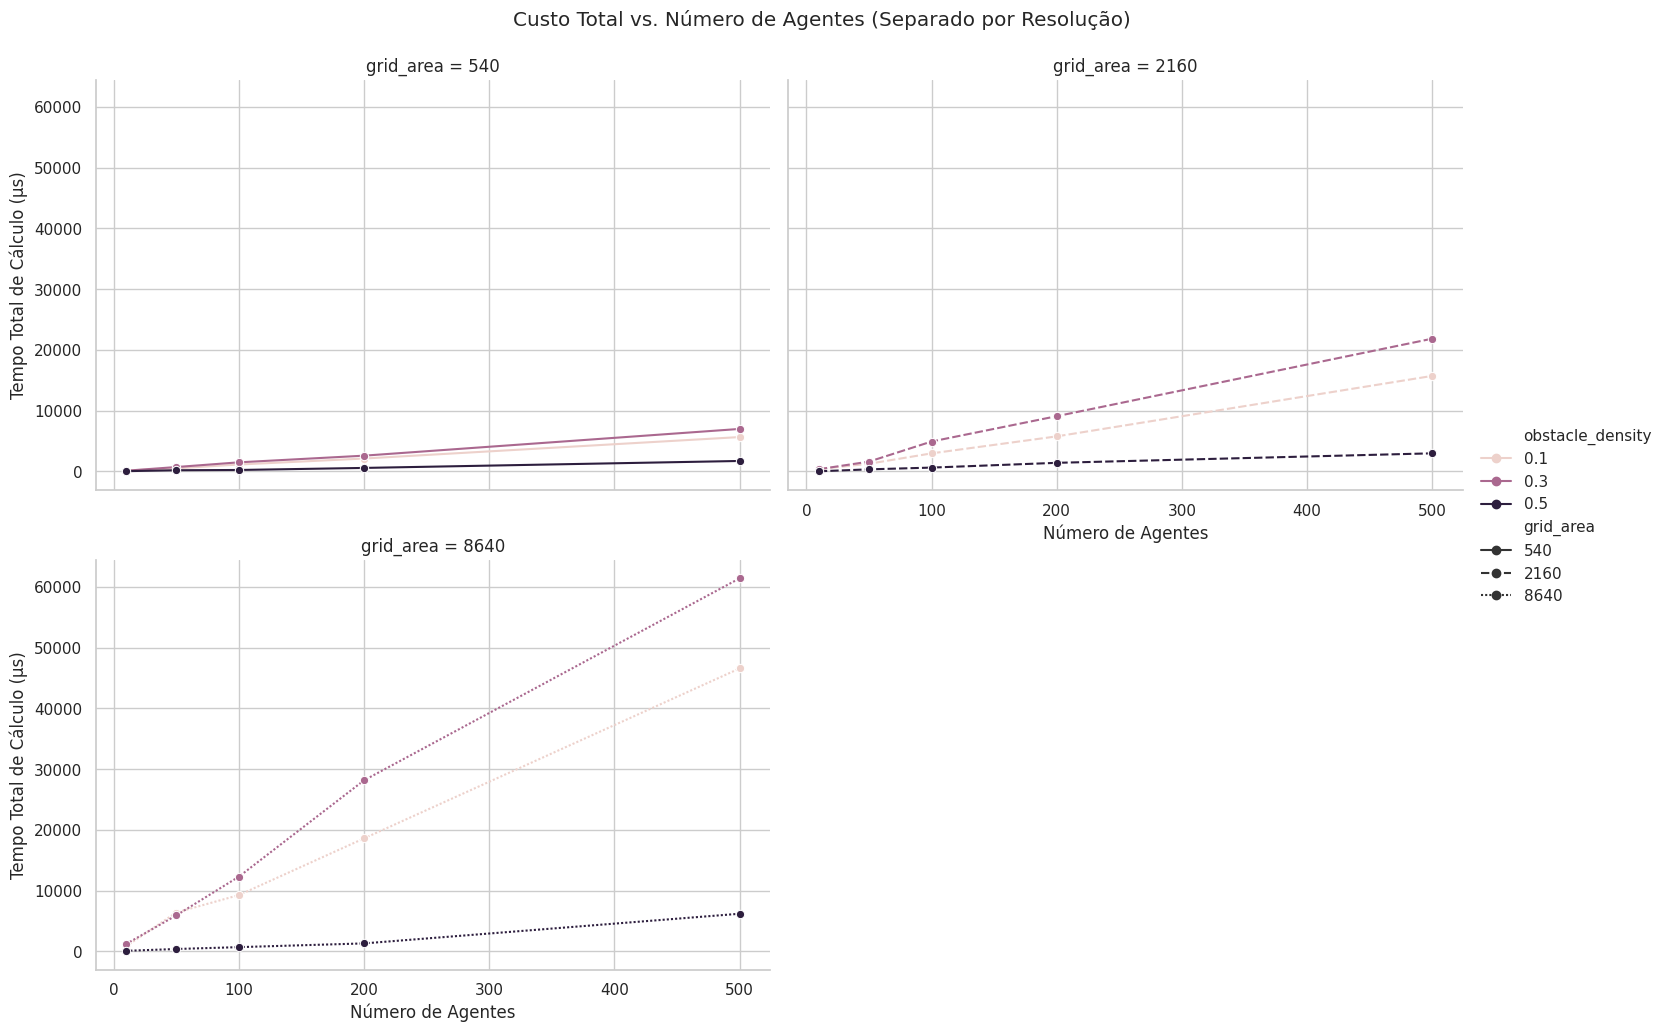

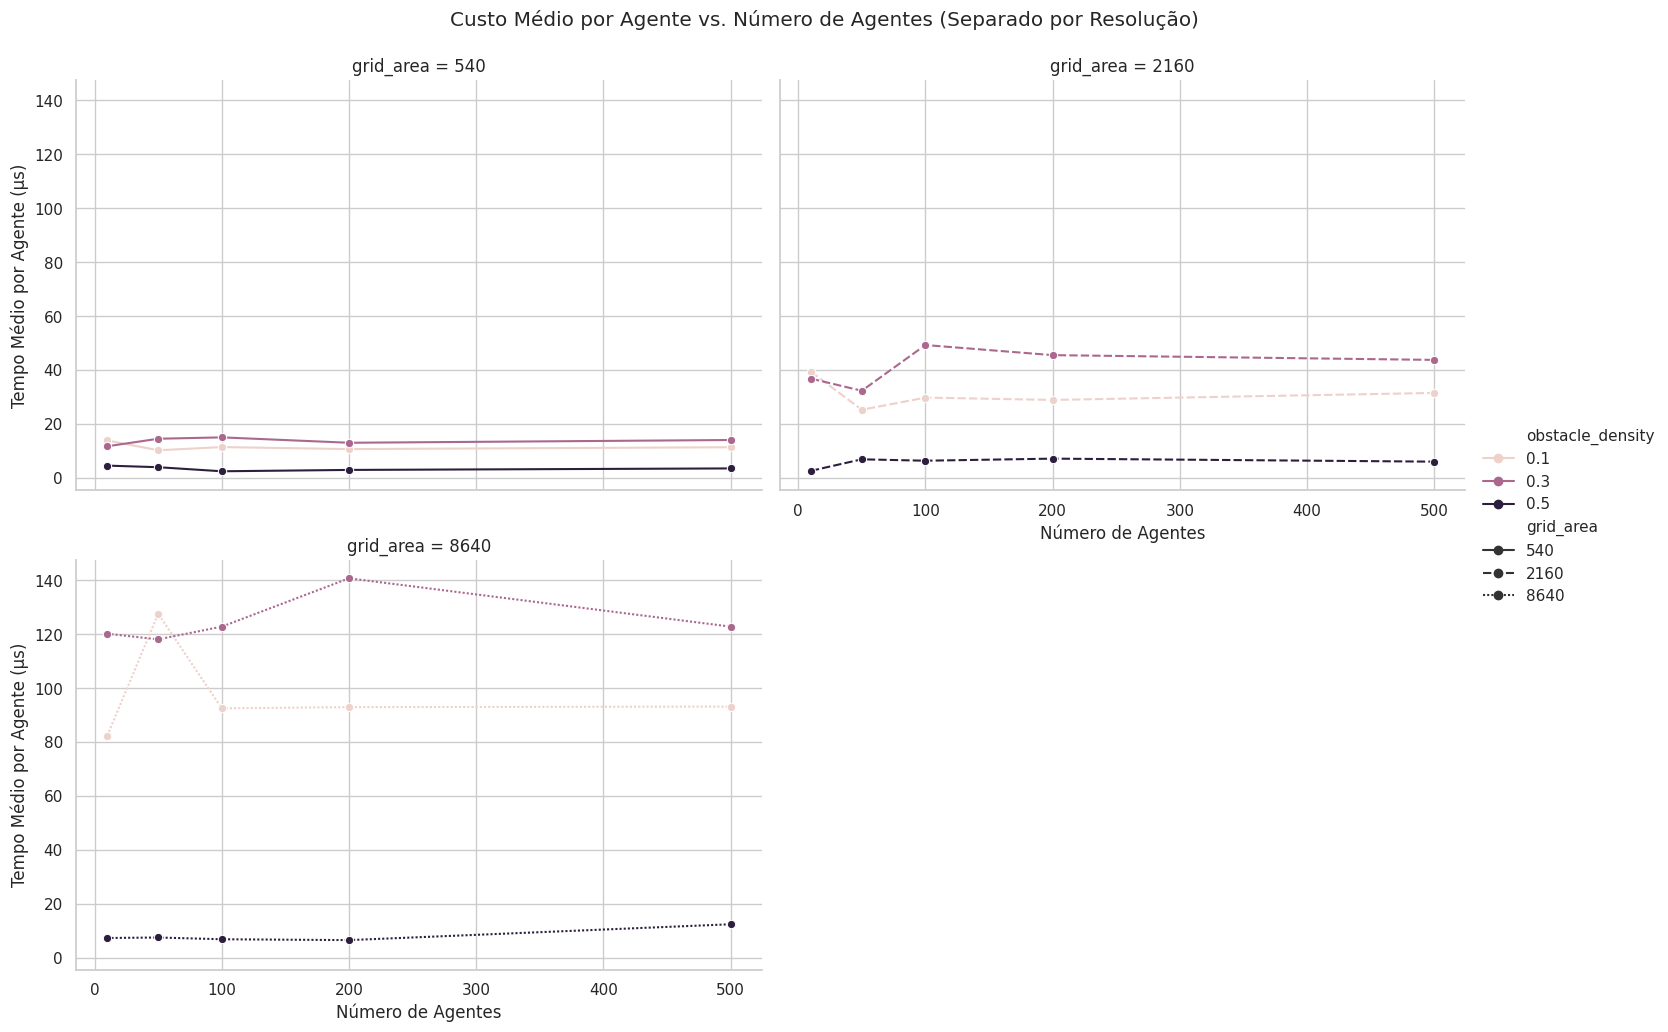

In [17]:
#@title 2. Análise 1: Custo vs. Número de Agentes
# Pergunta: O custo cresce conforme mais agentes aumentam?

# Filtra para uma resolução e densidade fixas para isolar a variável 'num_agents'
# (Vamos usar a resolução média e densidade média para este exemplo)
# Você pode mudar esses valores se quiser
try:
    # Gráfico 1: Tempo TOTAL
    # Como o tempo total cresce com mais agentes?
    # Espera-se um crescimento linear.

    # Usamos 'relplot' (gráfico relacional) para criar facetas
    # 'col' (coluna) -> cria um gráfico separado para cada 'obstacle_density'
    # 'row' (linha) -> cria um gráfico separado para cada 'grid_area'
    g_total = sns.relplot(
        data=df,
        x="num_agents",
        y="total_time_us",
        hue="obstacle_density", # Cor varia com a densidade
        style="grid_area",      # Estilo do ponto varia com a área
        kind="line",            # Tipo de gráfico de linha
        marker="o",             # Adiciona marcadores de ponto
        height=5,
        aspect=1.5,
        col="grid_area",        # Um gráfico por área de grid
        col_wrap=2,             # Duas colunas de gráficos
    )
    g_total.set_axis_labels("Número de Agentes", "Tempo Total de Cálculo (µs)")
    g_total.fig.suptitle("Custo Total vs. Número de Agentes (Separado por Resolução)", y=1.03)

    plt.show()

    # Gráfico 2: Tempo MÉDIO por agente
    # O custo de *cada* agente aumenta com mais agentes?
    # Espera-se que seja quase constante (linha reta).
    g_avg = sns.relplot(
        data=df,
        x="num_agents",
        y="avg_time_per_agent_us",
        hue="obstacle_density",
        style="grid_area",
        kind="line",
        marker="o",
        height=5,
        aspect=1.5,
        col="grid_area",
        col_wrap=2,
    )
    g_avg.set_axis_labels("Número de Agentes", "Tempo Médio por Agente (µs)")
    g_avg.fig.suptitle("Custo Médio por Agente vs. Número de Agentes (Separado por Resolução)", y=1.03)

    plt.show()

except NameError:
    print("DataFrame 'df' não foi carregado. Execute a célula 1 primeiro.")

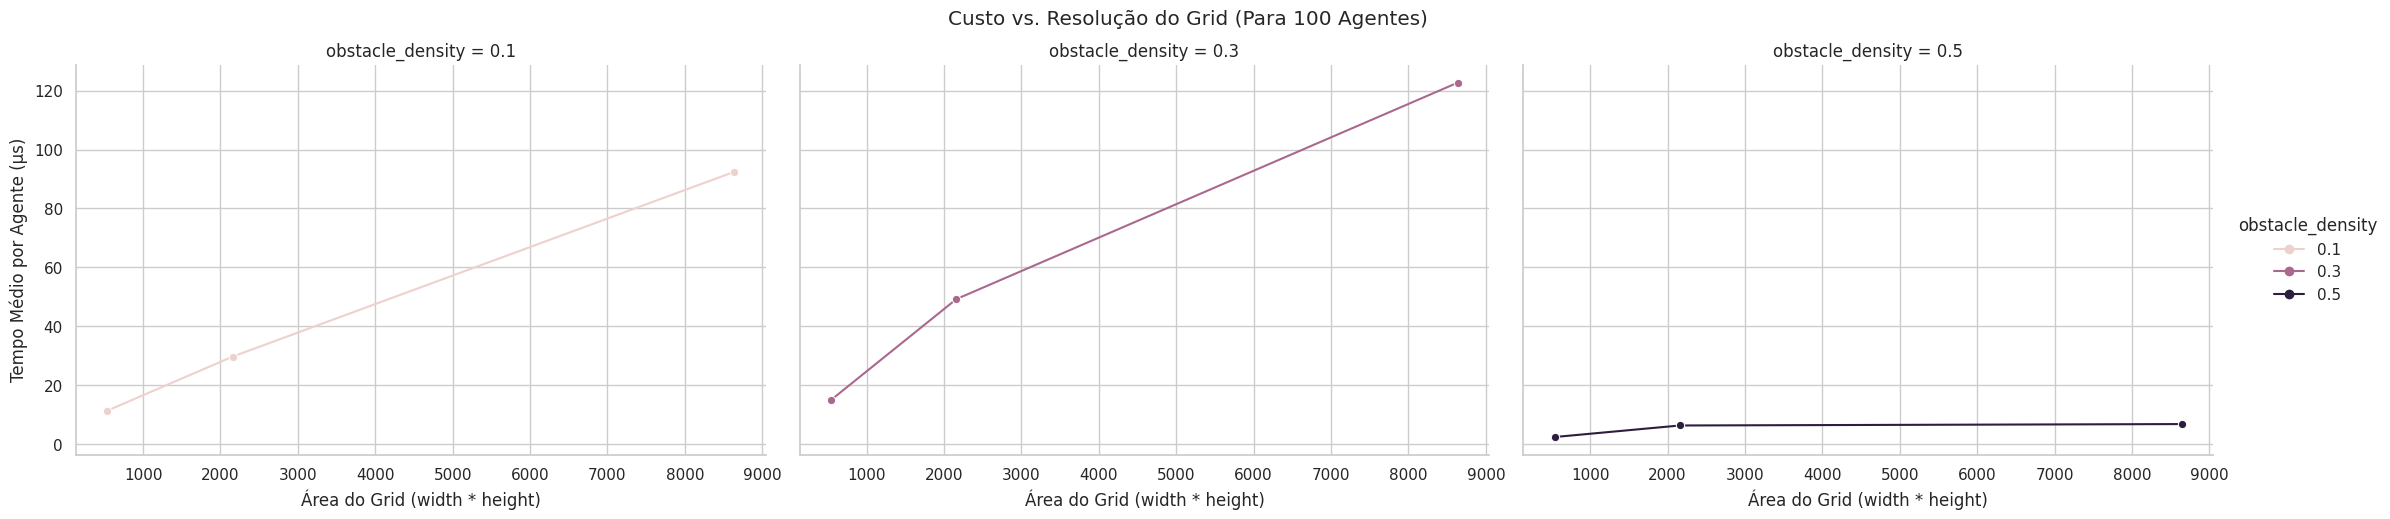


Observação: O eixo X (Área do Grid) pode não ser linear.
O A* tem complexidade relacionada ao número de nós (área), então um crescimento é esperado.


In [18]:
#@title 3. Análise 2: Custo vs. Resolução (Tamanho do Grid)
# Pergunta: O custo cresce conforme a resolução (área) aumenta?

try:
    # Filtra para um número fixo de agentes para isolar a variável 'grid_area'
    # Vamos usar 100 agentes como padrão
    df_filtered = df[df['num_agents'] == 100]

    g = sns.relplot(
        data=df_filtered,
        x="grid_area",
        y="avg_time_per_agent_us",
        hue="obstacle_density",     # Cor por densidade
        kind="line",
        marker="o",
        height=5,
        aspect=1.5,
        col="obstacle_density",     # Um gráfico por densidade
    )

    g.set_axis_labels("Área do Grid (width * height)", "Tempo Médio por Agente (µs)")
    g.fig.suptitle("Custo vs. Resolução do Grid (Para 100 Agentes)", y=1.03)
    plt.show()

    print("\nObservação: O eixo X (Área do Grid) pode não ser linear.")
    print("O A* tem complexidade relacionada ao número de nós (área), então um crescimento é esperado.")

except NameError:
    print("DataFrame 'df' não foi carregado. Execute a célula 1 primeiro.")
except Exception as e:
    print(f"Erro ao plotar: {e}")
    print("Verifique se há dados com 'num_agents == 100' no seu CSV.")